# Medical Cost Prediction

# Problem Statement

Given features, we've to calculate the final medical bill. 

## Content

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

**Importing Puython Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the dataset using pandas**

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Checking for missing data**

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Checking for outliers and performing exploratory data analysis**

<AxesSubplot:xlabel='sex', ylabel='count'>

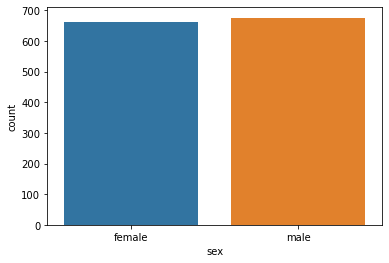

In [7]:
sns.countplot(data=df, x='sex')

<AxesSubplot:xlabel='children', ylabel='count'>

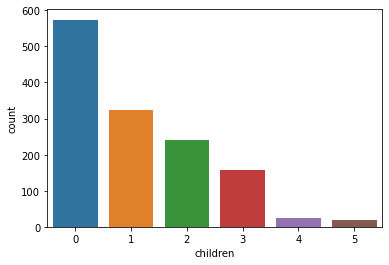

In [8]:
sns.countplot(data=df, x='children')

<AxesSubplot:xlabel='region', ylabel='count'>

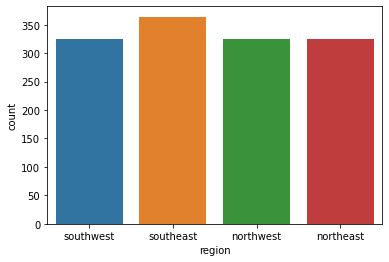

In [9]:
sns.countplot(data=df, x='region')

<AxesSubplot:xlabel='smoker', ylabel='count'>

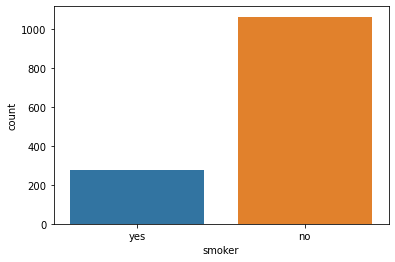

In [10]:
sns.countplot(data=df, x='smoker')

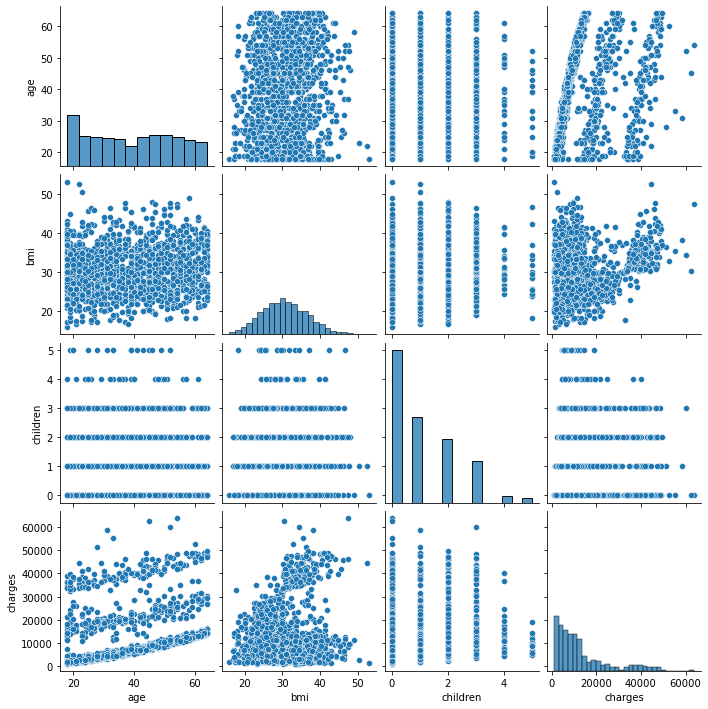

In [11]:
sns.pairplot(df)

<AxesSubplot:xlabel='charges', ylabel='Count'>

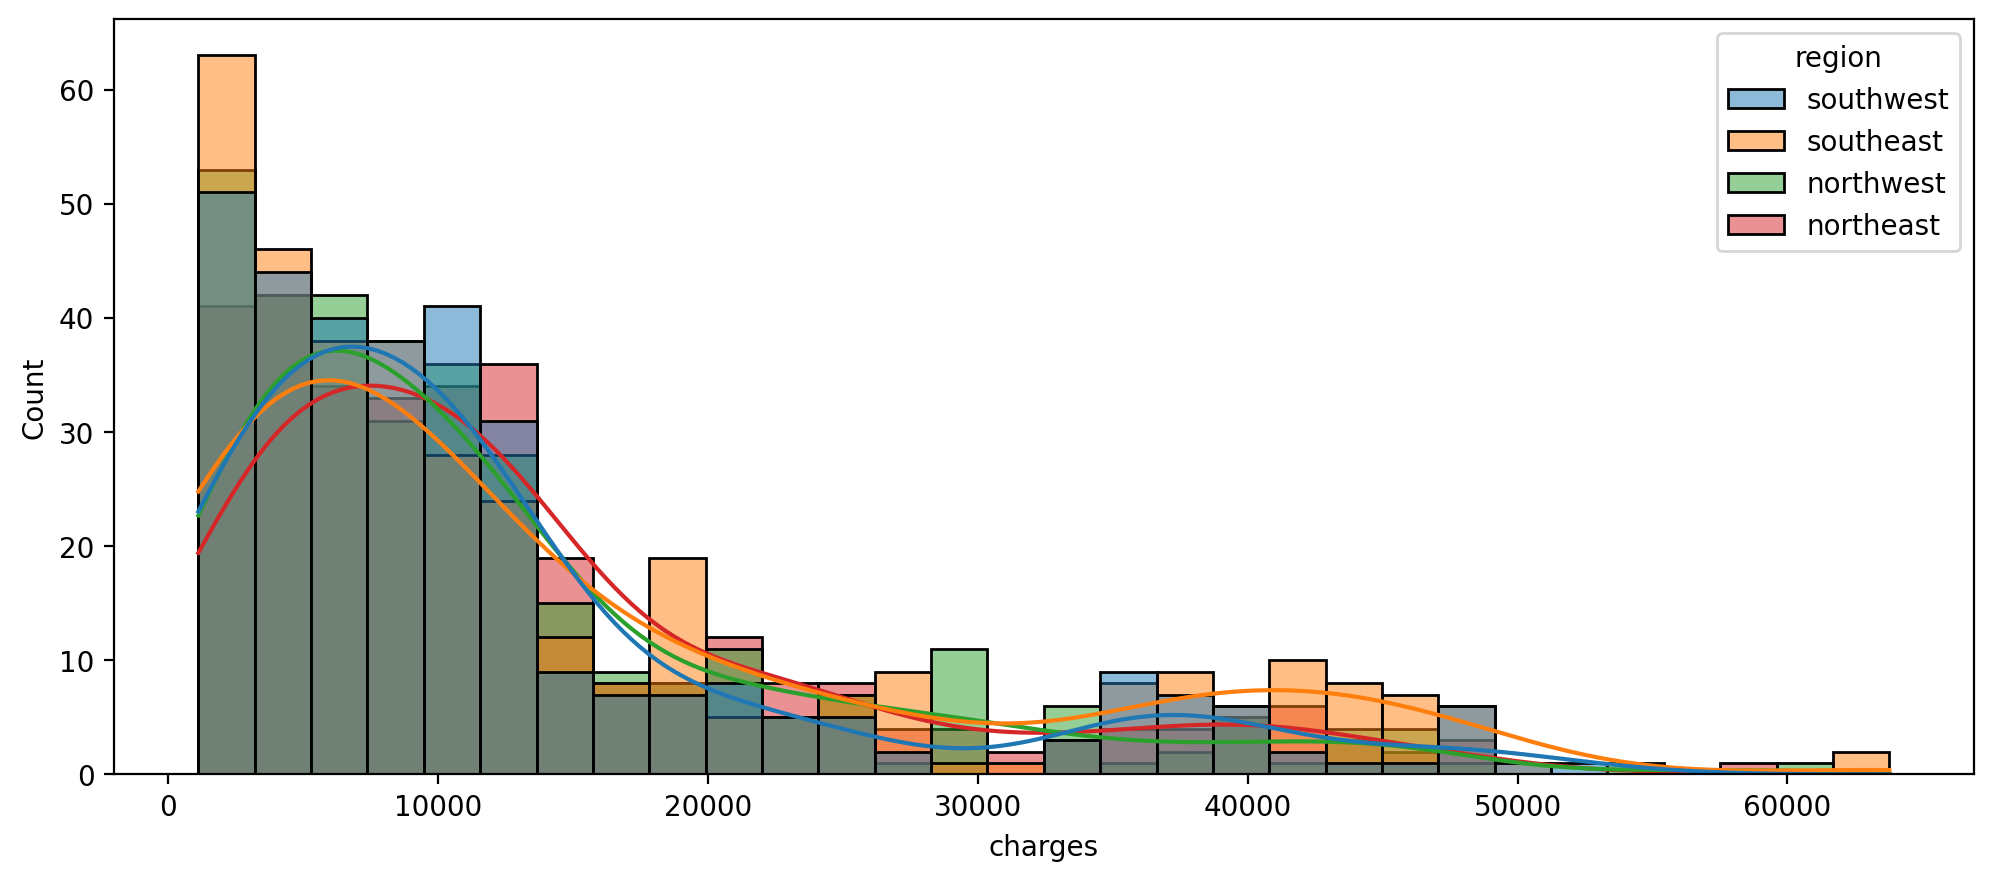

In [12]:
plt.figure(figsize=(12,5), dpi=200)
sns.histplot(data=df, x='charges', hue='region', kde=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

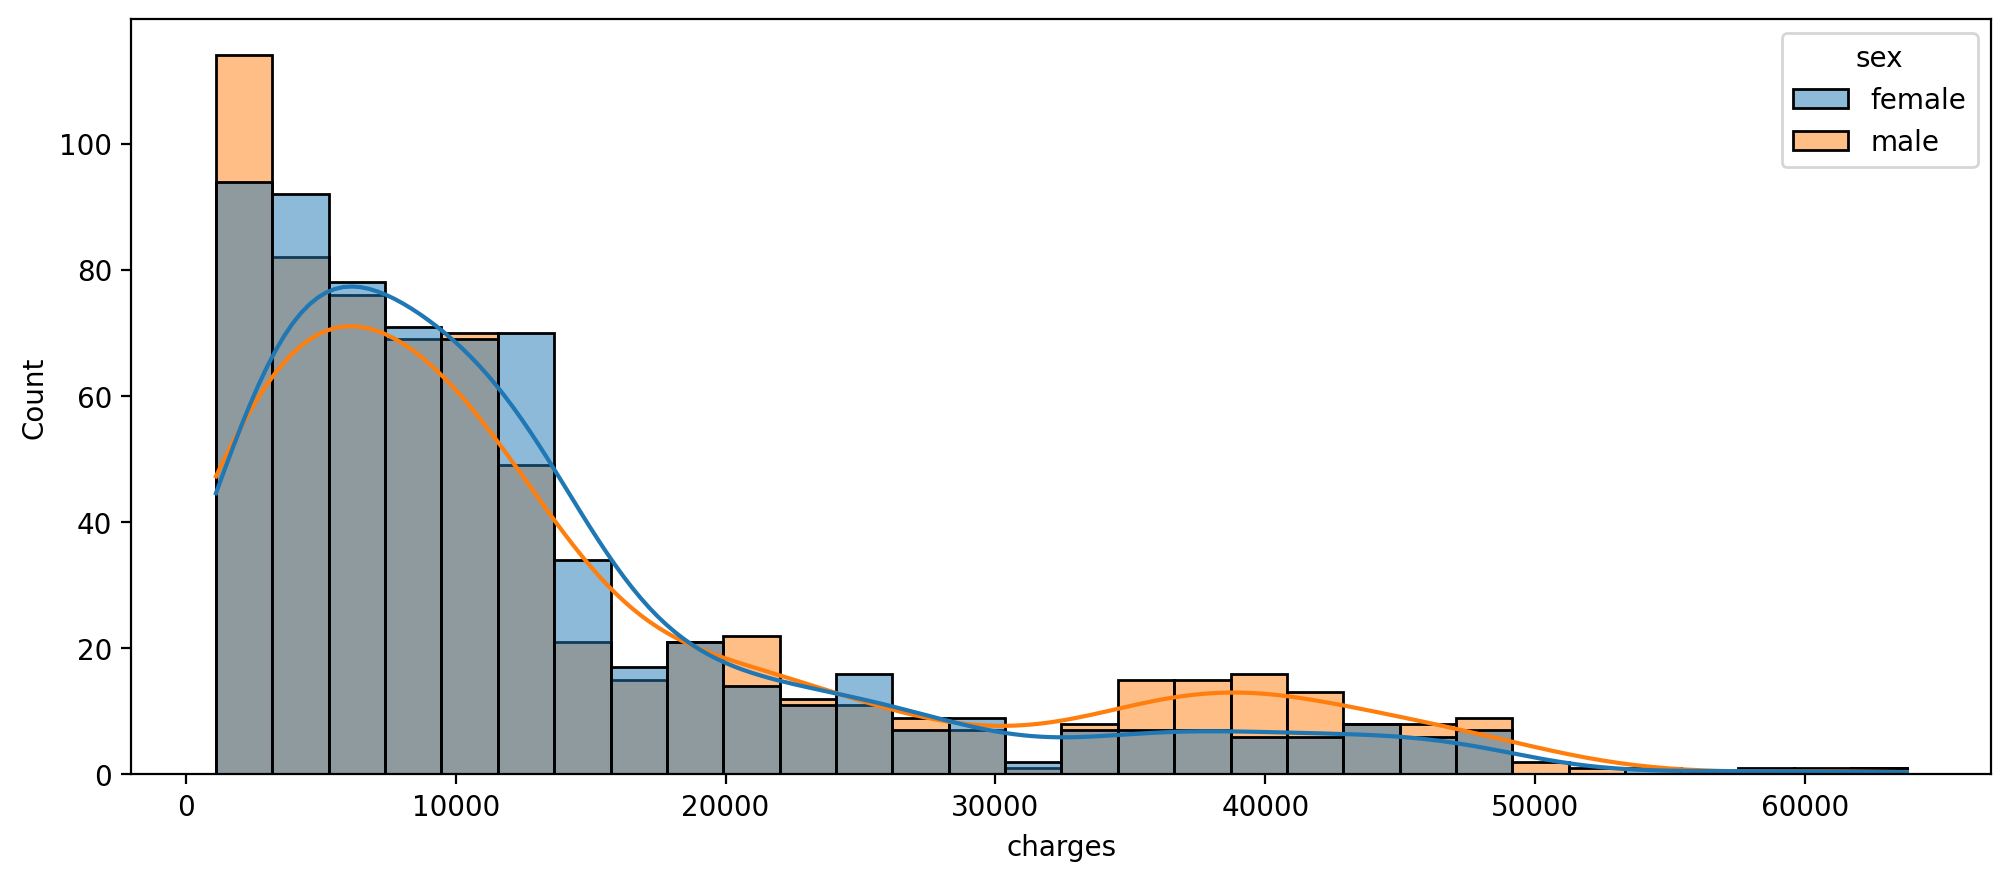

In [13]:
plt.figure(figsize=(12,5), dpi=200)
sns.histplot(data=df, x='charges', hue='sex', kde=True)

<AxesSubplot:>

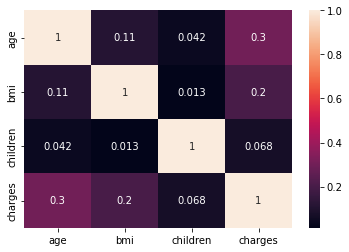

In [14]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='charges', ylabel='age'>

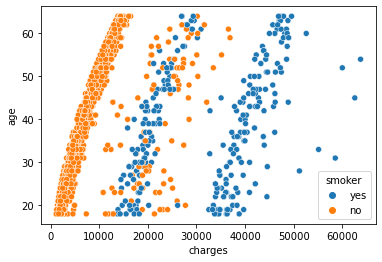

In [15]:
sns.scatterplot(data=df, x='charges', y='age', hue='smoker')

In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot:xlabel='age'>

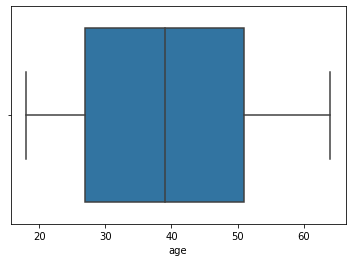

In [17]:
sns.boxplot(data=df, x='age')

<AxesSubplot:xlabel='bmi'>

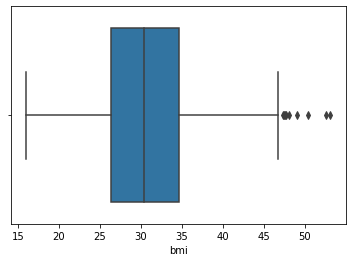

In [18]:
sns.boxplot(data=df, x='bmi')

In [19]:
df[df['bmi'] > 50]

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [20]:
df = df.drop([847,1047,1317])

<AxesSubplot:xlabel='charges'>

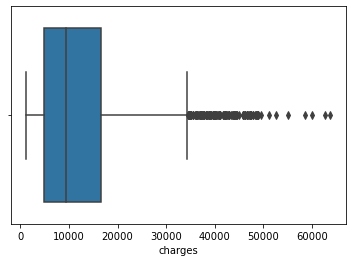

In [21]:
sns.boxplot(data=df, x='charges')

In [22]:
df = df.drop(df[df['charges']>35000].index, axis=0)

**Splitting the data into X (features) and y (labels)**

In [23]:
X = df.drop('charges', axis=1)
X = pd.get_dummies(X)

In [24]:
y = df['charges']

**Using train_test_split to further split the data**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Here, I use AdaBoost Regressor machine learning model**

In [27]:
from sklearn.ensemble import AdaBoostRegressor

In [28]:
model = AdaBoostRegressor(learning_rate=0.01, n_estimators=50, loss='exponential')

In [29]:
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, loss='exponential')

In [30]:
preds = model.predict(X_test)

**I import mean_absolure_error and mean_squared_error to test the predictions of the model. I compare the results with the mean and standard deviation of the dataset**

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
MAE = mean_absolute_error(y_test, preds)
MAE

2764.463815196878

In [33]:
RMSE = np.sqrt(mean_squared_error(y_test, preds))
RMSE

4677.936423359647